<a href="https://colab.research.google.com/github/zephyrroche/Zomato-Data-Analysis/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What type of restaurant do the majority of customers order from?
2. How many votes has each type of restaurant received from customers?
3. What are the ratings that the majority of restaurants have received?
4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?
5. Which mode (online or offline) has received the maximum rating?
6. Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving ZomatoData.csv to ZomatoData.csv


In [ ]:
dataframe = pd.read_csv('ZomatoData.csv')

In [ ]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [ ]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0];
  return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'type of restaurant')

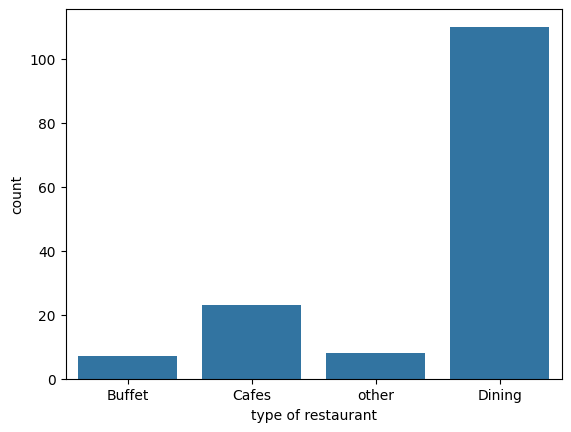

In [ ]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")

**Majority of the restaurant falls into the dinnning category**

# How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'Votes')

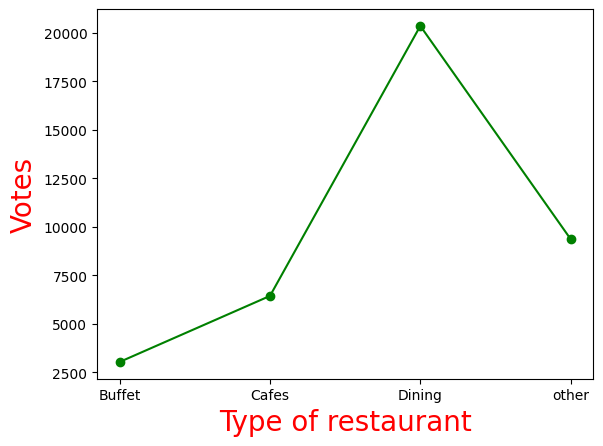

In [ ]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c='red', size=20)
plt.ylabel("Votes", c="red", size=20)

**Dinning restaurants receive maximum votes**

# What are the ratings that the majority of restaurants have received?

Text(0.5, 1.0, 'ratings distribution')

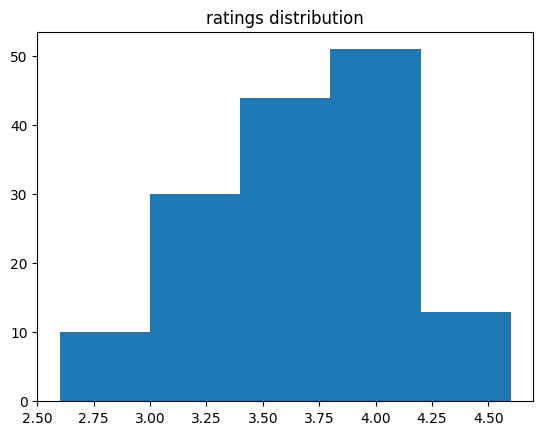

In [ ]:
plt.hist(dataframe['rate'], bins=5)
plt.title("ratings distribution")

**The majority restaurants received ratings from 3.5 to 4**

# Zomato has observed that most couples order most of their food online. What is their average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

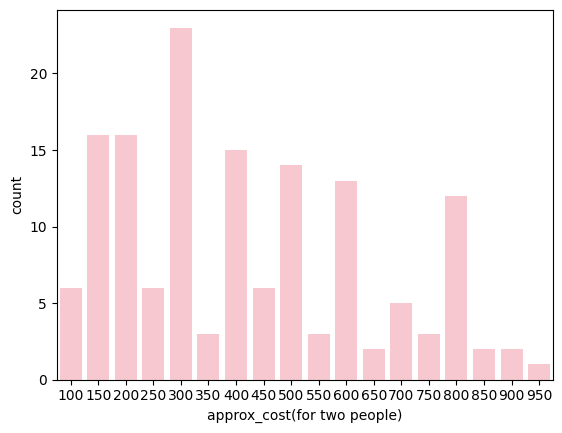

In [ ]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, color='pink')

**The majority of the couplesprefer restaurants with an approximate cost of 300 rupees**

# Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

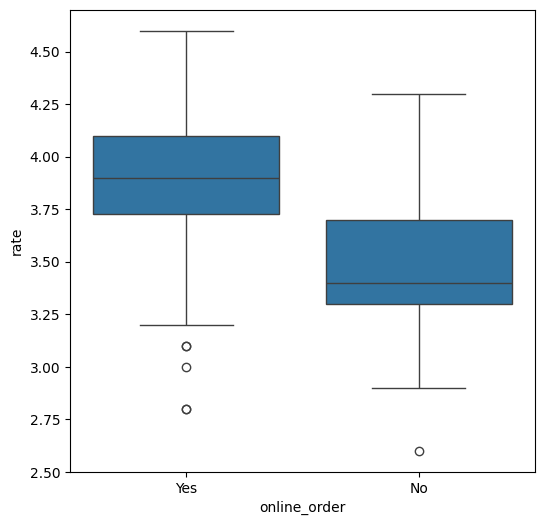

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=dataframe)

**Offline order received lower rating in comparison to online order**

# Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers?

Text(50.722222222222214, 0.5, 'Listed in (Type)')

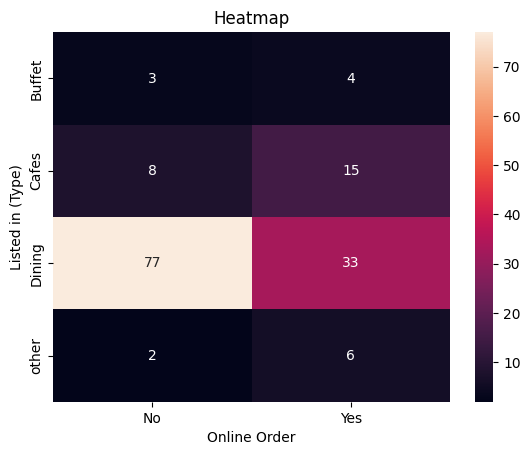

In [ ]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")

**Dining restaurants primarily accept offline oders whereas cafes primarily receive online orders. This suggests that clients prefer orders in person at restaurants, but prefer ordering online at cafes.**

Conclusion
What type of restaurant do the majority of customers order from? The most popular type of restaurant are 'Delivery' or 'Cafes'. This indicates that customers predominantly order from places optimized for food delivery or casual dining.

How many votes has each type of restaurant received from customers? The restaurant type that receives the most engagement is Dining which tops the list.

What are the ratings that the majority of restaurants have received? Most restaurants tend to have ratings between 3.5 to 4.5, with a peak around 4.This suggests generally favorable customer experiences.

Zomato has observed that most couples order most of their food online. What is their average spending on each order? Couples ordering online spend around ₹300–₹500 on average per order

Which mode (online or offline) has received the maximum rating? Online orders receive higher ratings compared to offline orders. This suggests a smoother or more satisfying customer experience through online platforms.

Which type of restaurant received more offline orders, so that Zomato can provide those customers with some good offers? Restaurant types like 'Casual Dining' or 'Buffet' have higher offline order counts. These are the best targets for Zomato's offline promotional offers.